In [43]:
# Импортируем библиотеки - это как подключение инструментов для работы
import pandas as pd  # Для работы с таблицами данных
import numpy as np   # Для математических операций
import matplotlib.pyplot as plt # модуль для построения графиков и визуализаций.
from sklearn.preprocessing import LabelEncoder # преобразовыватель категориальные (текстовые) значений в числовые коды.
import seaborn as sns # библиотека для статистической визуализации, построенная поверх matplotlib.
from sklearn.model_selection import train_test_split  # Функция для разделения данных
from sklearn.tree import DecisionTreeClassifier

In [44]:
# pd.read_csv() - функция читает CSV-файл и создает DataFrame. Возвращает табличную структуру данных.
df = pd.read_csv('airline_passenger_satisfaction.csv') 
# pd.set_option() - функция устанавливает параметры отображения pandas. 'display.max_columns', None означает показывать все столбцы без ограничений.
pd.set_option('display.max_columns', None)
# head() - метод возвращает первые 5 строк DataFrame (по умолчанию), полезен для быстрого просмотра структуры данных.
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [45]:
# drop() - метод удаляет указанные столбцы или строки из DataFrame

# columns - список столбцов для удаления
# inplace=True - изменяет исходный DataFrame без создания копии

df.drop(columns = ['id', 'Unnamed: 0'], inplace=True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [46]:
# dtypes - атрибут показывает типы данных каждого столбца
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

## Data Cleaning (Очистка данных)

In [47]:
# info() - метод выводит краткую информацию о DataFrame: типы данных, количество непустых значений, использование памяти
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [49]:
# dropna() - метод удаляет строки с пропущенными значениями
# inplace=True - изменяет исходный DataFrame
df.dropna(inplace=True)

In [50]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [51]:
df.shape

(103594, 23)

## Charts (Визуализация данных)

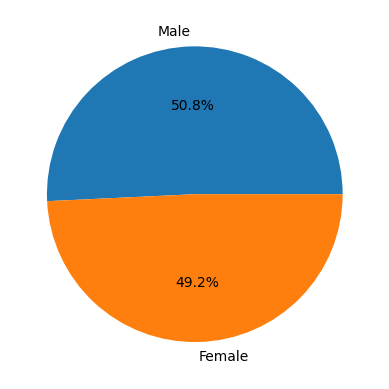

In [55]:
# plt.pie() - функция создает круговую диаграмму

# df['satisfaction'].value_counts() - подсчитывает количество каждого уникального значения
# labels - подписи для секторов диаграммы
# autopct='%1.1f%%' - формат отображения процентов

plt.pie(df['Gender'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%')

# plt.show() - функция отображает график на экране
plt.show()

## Coding Data

In [56]:
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [57]:
# LabelEncoder() - создает экземпляр кодировщика для преобразования текстовых категорий в числа

label_encoder = LabelEncoder()

# df.select_dtypes(include = 'object').drop(columns='satisfaction').columns 
# Выбор колонок типа object и удаление результирующей колонки satisfaction

columns = ['Gender', 'Type of Travel','Customer Type', 'Class'] # Выполнение кодирования с фиксированным списком
for col in columns:
    df[col] = label_encoder.fit_transform(df[col])

# fit_transform() - метод обучает кодировщик и сразу преобразует данные

#  fit() - запоминает уникальные значения категорий
#  transform() - преобразует категории в числа
    

In [58]:
df.dtypes 

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

## Additional Charts (другие графики)

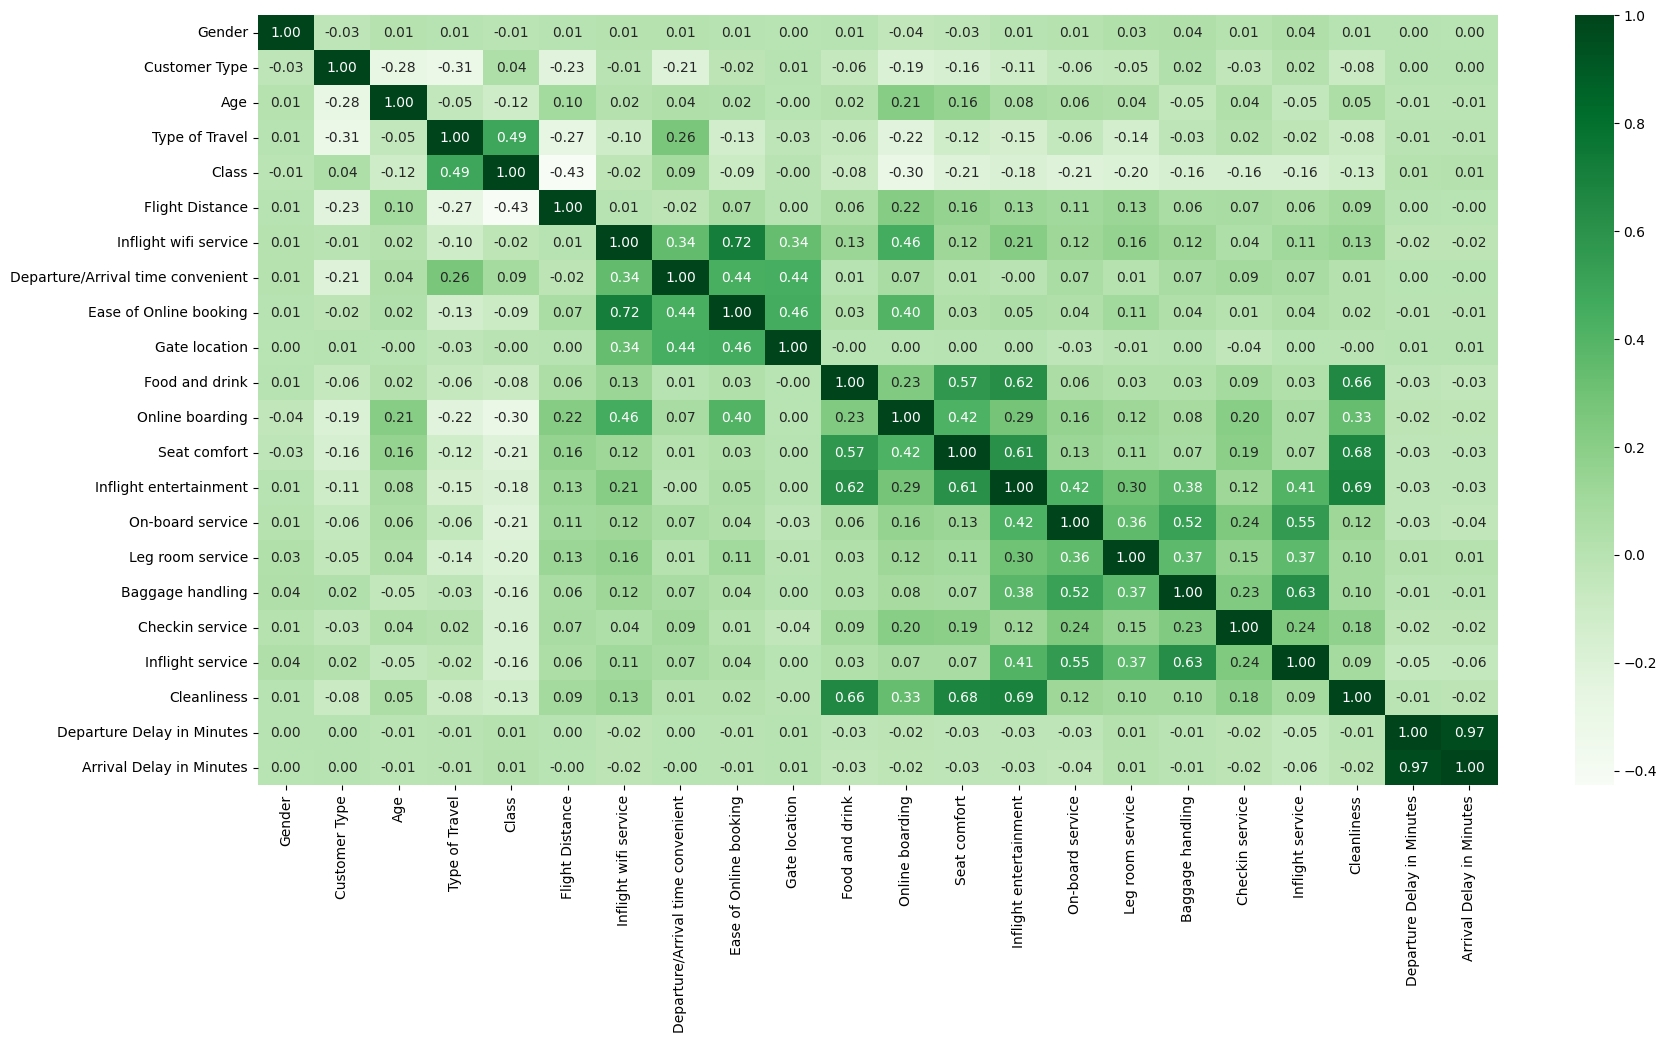

In [59]:
# sns.heatmap() - создает тепловую карту корреляций

# df.corr() - вычисляет корреляционную матрицу
# annot=True - показывает значения корреляций в ячейках
# fmt='.2f' - формат отображения чисел (2 знака после запятой)
# cmap='Greens' - цветовая схема

plt.figure(figsize=(20,10))
sns.heatmap(df.drop(columns='satisfaction').corr(), annot=True, fmt='.2f', cmap='Greens') # График корреляции
plt.show()

## Filtering Data

In [60]:
# df[[список_столбцов]] - выбирает несколько столбцов из DataFrame
df[['Gender', 'Age', 'Type of Travel']].head()

,Gender,Age,Type of Travel
0,1,13,1
1,1,25,0
2,0,26,0
3,0,25,0
4,1,61,0


In [61]:
# df.loc[строки, столбцы] - выбирает данные по меткам

# 2:5 - строки с индексами от 2 до 5 включительно
# список_столбцов - конкретные столбцы

df.loc[2:5, ['Gender', 'Age', 'Type of Travel']]

,Gender,Age,Type of Travel
2,0,26,0
3,0,25,0
4,1,61,0
5,0,26,1


In [62]:
# df.loc[условие, столбцы] - выбирает строки, удовлетворяющие условию

# df['Age']>50 - логическое условие для фильтрации

df.loc[df['Age']>50, ['Gender', 'Age', 'Type of Travel']].head()

,Gender,Age,Type of Travel
4,1,61,0
7,0,52,0
12,1,53,0
23,0,58,1
25,1,57,1


In [63]:
df.columns # columns - атрибут возвращает названия всех столбцов DataFrame

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Models (алгоритмы ML)

In [64]:
# df.drop(columns='satisfaction') - удаляет столбец 'satisfaction', создавая матрицу признаков X

X=df.drop(columns = 'satisfaction')
X.head()
X.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [65]:
y = df['satisfaction'] # Извлекает целевую переменную (то, что мы хотим предсказать)
y.head()

0    neutral or dissatisfied
1    neutral or dissatisfied
2                  satisfied
3    neutral or dissatisfied
4                  satisfied
Name: satisfaction, dtype: object

In [66]:
y.info()

<class 'pandas.core.series.Series'>
Index: 103594 entries, 0 to 103903
Series name: satisfaction
Non-Null Count   Dtype 
--------------   ----- 
103594 non-null  object
dtypes: object(1)
memory usage: 5.6+ MB


### DecisionTree

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix  # Импортируем метрики точности
from sklearn.model_selection import train_test_split # Импортируем функцию для разделения данных
df_dataset = pd.read_csv('airline_passenger_satisfaction.csv')
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [68]:
label_encoder = LabelEncoder()

# df_dataset.select_dtypes(include='object') — выбираем только те столбцы, где тип данных "object"
# .drop(columns='satisfaction') — убираем целевую переменную "satisfaction", 
# т.к. мы не должны её кодировать вместе с признаками.
# .columns — получаем список названий таких текстовых столбцов.
df_dataset.select_dtypes(include = 'object').drop(columns='satisfaction').columns 

for col in columns:
    df_dataset[col] = label_encoder.fit_transform(df_dataset[col])

In [69]:
df_dataset.drop(columns = ['id', 'Unnamed: 0'], inplace=True)
df_dataset.dropna(inplace=True)
df_dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [70]:
X=df_dataset.drop(columns = 'satisfaction')
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [71]:
y = df_dataset['satisfaction']
y.head()

0    neutral or dissatisfied
1    neutral or dissatisfied
2                  satisfied
3    neutral or dissatisfied
4                  satisfied
Name: satisfaction, dtype: object

In [72]:
# ПРАВИЛЬНОЕ разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                    # Наши данные
    test_size=0.2,          # 20% данных для тестирования
    random_state=42,        # Фиксируем случайность для воспроизводимости
    stratify=y              # Сохраняем пропорции классов в обеих выборках
)

In [73]:
model = DecisionTreeClassifier() # DecisionTreeClassifier() - создает модель дерева решений с параметрами по умолчанию
model.fit(X_train, y_train) # fit() - метод обучает модель на данных X (признаки) и y (целевые значения)

DecisionTreeClassifier()

In [74]:
predictions = model.predict(X_test) # predict() - метод делает предсказания для новых данных X_test

In [77]:
# Вычисление всех метрик качества модели
accuracy = accuracy_score(y_test, predictions)  # accuracy_score() - сравнивает истинные значения y_test с предсказаниями и возвращает долю совпадений
# pos_label='satisfied' → считаем метрику только для одного класса. Только для бинарной классификации (satisfied vs neutral or dissatisfied).
# В таком режиме метрика отвечает на вопрос: «Насколько хорошо модель умеет находить именно класс 'satisfied'?»
precision = precision_score(y_test, predictions, pos_label='satisfied')  # precision_score() - вычисляет точность (из предсказанных положительных, сколько действительно положительных)
recall = recall_score(y_test, predictions, pos_label='satisfied')  # recall_score() - вычисляет полноту (из всех положительных случаев, сколько мы нашли)
f1 = f1_score(y_test, predictions, pos_label='satisfied')  # f1_score() - гармоническое среднее между precision и recall

# average='weighted' → берём оба класса и усредняем их результат, учитывая их количество.
# average='weighted' отвечает на вопрос: «В среднем по всем классам, насколько хорошо работает модель»
f_beta_05 = fbeta_score(y_test, predictions, beta=0.5, average='weighted')  # fbeta_score() с beta=0.5 - больше веса precision
f_beta_2 = fbeta_score(y_test, predictions, beta=2.0, average='weighted')  # fbeta_score() с beta=2.0 - больше веса recall

print("📊 РЕЗУЛЬТАТЫ ОЦЕНКИ МОДЕЛИ DECISION TREE:")
print("="*50)
print(f"Accuracy (Точность):           {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision (Точность полож.):   {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall (Полнота):              {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:                      {f1:.4f} ({f1*100:.2f}%)")
print(f"F-Beta (β=0.5, упор на Precis): {f_beta_05:.4f} ({f_beta_05*100:.2f}%)")
print(f"F-Beta (β=2.0, упор на Recall): {f_beta_2:.4f} ({f_beta_2*100:.2f}%)")

print(f"\n📝 Интерпретация результатов:")
print(f"• Из {len(y_test)} пассажиров модель правильно классифицировала {int(accuracy * len(y_test))}")
print(f"• Общая точность составляет {accuracy*100:.2f}%")

📊 РЕЗУЛЬТАТЫ ОЦЕНКИ МОДЕЛИ DECISION TREE:
Accuracy (Точность):           0.9440 (94.40%)
Precision (Точность полож.):   0.9311 (93.11%)
Recall (Полнота):              0.9403 (94.03%)
F1-Score:                      0.9357 (93.57%)
F-Beta (β=0.5, упор на Precis): 0.9440 (94.40%)
F-Beta (β=2.0, упор на Recall): 0.9440 (94.40%)

📝 Интерпретация результатов:
• Из 20719 пассажиров модель правильно классифицировала 19558
• Общая точность составляет 94.40%


In [78]:
# Матрица ошибок
cm = confusion_matrix(y_test, predictions)
print(f"\n🔍 МАТРИЦА ОШИБОК:")
print(f"True Negative (правильно 'неудовлетворен'): {cm[0,0]}")
print(f"False Positive (ложно 'удовлетворен'): {cm[0,1]}")
print(f"False Negative (ложно 'неудовлетворен'): {cm[1,0]}")
print(f"True Positive (правильно 'удовлетворен'): {cm[1,1]}")


🔍 МАТРИЦА ОШИБОК:
True Negative (правильно 'неудовлетворен'): 11115
False Positive (ложно 'удовлетворен'): 625
False Negative (ложно 'неудовлетворен'): 536
True Positive (правильно 'удовлетворен'): 8443


### Random Forest (Домашнее задание)

In [ ]:
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier - алгоритм "случайный лес", который объединяет множество деревьев решений

model = RandomForestClassifier()
model.fit(X, y)

predictions = model.predict(X_test)
predictions

accuracy_score(y_test, predictions)

### KNeighborsClassifier (Домашнее задание)

In [ ]:
X_test.isnull().sum()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # KNeighborsClassifier - алгоритм k ближайших соседей n_neighbors=5 - количество соседей для классификации

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

predictions = model.predict(X_test)
predictions

accuracy_score(y_test, predictions)

### Logistic Regression (Домашнее задание)

In [ ]:
from sklearn.linear_model import LogisticRegression # LogisticRegression - алгоритм логистической регрессии max_iter=10000 - максимальное количество итераций для сходимости

model = LogisticRegression(max_iter=10000)
model.fit(X, y)

predictions = model.predict(X_test)
predictions

accuracy_score(y_test, predictions)

In [ ]:
model.predict(new_df)

## Saving prediction model

In [79]:
import joblib

In [ ]:
# joblib.dump() - сохраняет модель в файл

# model - объект модели для сохранения
# 'filename.joblib' - имя файла для сохранения

joblib.dump(model, 'airl_pass_satisf.joblib')

In [ ]:
test_inputs = {
 'Gender': [1, 0],
 'Customer Type': [0, 1],
 'Age': [25, 15],
 'Type of Travel': [0, 1],
 'Class': [1, 0],
 'Flight Distance': [800, 2000],
 'Departure Delay in Minutes': [0, 10],
 'Arrival Delay in Minutes': [0, 20]
}

test_inputs

In [ ]:
trained_model = joblib.load('airl_pass_satisf.joblib') # joblib.load() - загружает сохраненную модель из файла

In [ ]:
new_df = pd.DataFrame(test_inputs)
new_df

trained_model.predict(new_df)